# Housing Price Prediction using Linear Regression

## 1. Introduction

Predicting housing prices is a classical regression problem in machine learning. 
In this project, we build a Linear Regression model from scratch to estimate house prices using numerical features such as area, number of bedrooms, and other structural attributes.

The objective of this notebook is not only to fit a predictive model, but also to analyze the convergence behavior of Gradient Descent under different learning rates and feature scaling conditions.

We compare:
- Gradient Descent optimization
- The Normal Equation (closed-form solution)

This study helps build a strong foundation in convex optimization and prepares for more advanced models such as Logistic Regression.


In [11]:
#importing modules necessary
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [12]:
#reading the csv file 
df = pd.read_csv("house_prices.csv")
df.head()

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,...,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,NaN,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,...,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,NaN,NaN
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,...,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,NaN,NaN
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,...,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,...,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,NaN,NaN


In [13]:
df.shape
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187531 entries, 0 to 187530
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Index              187531 non-null  int64  
 1   Title              187531 non-null  object 
 2   Description        184508 non-null  object 
 3   Amount(in rupees)  187531 non-null  object 
 4   Price (in rupees)  169866 non-null  float64
 5   location           187531 non-null  object 
 6   Carpet Area        106858 non-null  object 
 7   Status             186916 non-null  object 
 8   Floor              180454 non-null  object 
 9   Transaction        187448 non-null  object 
 10  Furnishing         184634 non-null  object 
 11  facing             117298 non-null  object 
 12  overlooking        106095 non-null  object 
 13  Society            77853 non-null   object 
 14  Bathroom           186703 non-null  object 
 15  Balcony            138596 non-null  object 
 16  Ca

Index                     0
Title                     0
Description            3023
Amount(in rupees)         0
Price (in rupees)     17665
location                  0
Carpet Area           80673
Status                  615
Floor                  7077
Transaction              83
Furnishing             2897
facing                70233
overlooking           81436
Society              109678
Bathroom                828
Balcony               48935
Car Parking          103357
Ownership             65517
Super Area           107685
Dimensions           187531
Plot Area            187531
dtype: int64

## Data Cleaning 
in the above cells we have seen the structure of the csv file 
now we will remove irrelevant columns and NA values from our Y variable(prices)

In [14]:
df = df.dropna(subset=["Price (in rupees)"])
df = df.drop(columns=["Dimensions", "Plot Area"])
df = df.drop(columns=["Title", "Description", "Society"])
#drops irrelevant columns

In [15]:
df["Carpet Area"] = df["Carpet Area"].str.extract(r'(\d+)')
df["Carpet Area"] = pd.to_numeric(df["Carpet Area"], errors='coerce')
df["Super Area"] = df["Super Area"].str.extract(r'(\d+)')
df["Super Area"] = pd.to_numeric(df["Super Area"], errors='coerce')
df["Bathroom"] = pd.to_numeric(df["Bathroom"], errors='coerce')
df["Balcony"] = pd.to_numeric(df["Balcony"], errors='coerce')


In [16]:
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 169866 entries, 0 to 187530
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Index              169866 non-null  int64  
 1   Amount(in rupees)  169866 non-null  object 
 2   Price (in rupees)  169866 non-null  float64
 3   location           169866 non-null  object 
 4   Carpet Area        93631 non-null   float64
 5   Status             169271 non-null  object 
 6   Floor              163023 non-null  object 
 7   Transaction        169860 non-null  object 
 8   Furnishing         167806 non-null  object 
 9   facing             107814 non-null  object 
 10  overlooking        99220 non-null   object 
 11  Bathroom           169084 non-null  float64
 12  Balcony            124789 non-null  float64
 13  Car Parking        78916 non-null   object 
 14  Ownership          111629 non-null  object 
 15  Super Area         76235 non-null   float64
dtypes: floa

,Index,Price (in rupees),Carpet Area,Bathroom,Balcony,Super Area
count,169866.000000,1.698660e+05,93631.000000,169084.000000,124789.000000,76235.000000
mean,93169.479036,7.583772e+03,1212.795634,2.445122,2.032479,1311.314777
std,54734.984200,2.724171e+04,3220.372972,0.843642,0.956583,678.271640
min,0.000000,0.000000e+00,1.000000,1.000000,1.000000,1.000000
25%,44715.250000,4.297000e+03,776.000000,2.000000,1.000000,950.500000
50%,93239.500000,6.034000e+03,1050.000000,2.000000,2.000000,1255.000000
75%,141115.750000,9.450000e+03,1500.000000,3.000000,3.000000,1650.000000
max,187530.000000,6.700000e+06,709222.000000,10.000000,10.000000,9450.000000


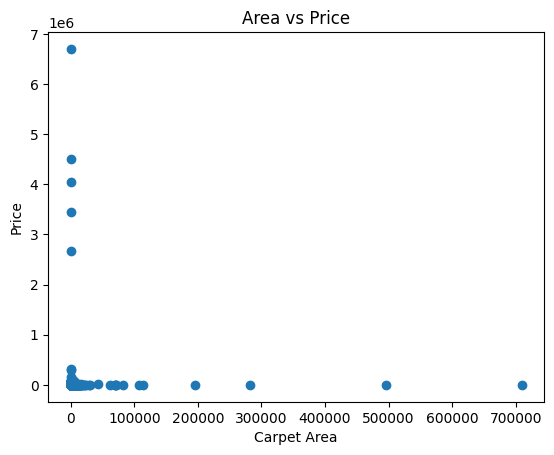

In [17]:
plt.scatter(df["Carpet Area"], df["Price (in rupees)"])
plt.xlabel("Carpet Area")
plt.ylabel("Price")
plt.title("Area vs Price")
plt.show()


In [ ]:
#defining targets and features 
df = df.fillna(df.median(numeric_only=True))    #to fill in remaning value 
Y = df['Price (in rupees)'].values.reshape(-1,1)
X = df.drop(columns=['Price (in rupees)']).values

In [ ]:
#splicing the data 80-20/ standardization 
np.random.seed(42)

indices = np.random.permutation(len(X))
split = int(0.8 * len(X))

train_idx = indices[:split]
test_idx = indices[split:]

X_train, X_test = X[train_idx], X[test_idx]
Y_train, Y_test = Y[train_idx], Y[test_idx]


mean = X_train.mean(axis=0)
std = X_train.std(axis=0)

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [ ]:
#adding bias
X_train = np.column_stack((np.ones(X_train.shape[0]), X_train))
X_test = np.column_stack((np.ones(X_test.shape[0]), X_test))